# Preprocessing Data and Exploratory Data Analysis

In [1]:
#Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

### Loading Datasets

In [2]:
# Load the datasets
combine_df = pd.read_csv("../datasets/combine.csv") 
draft_df = pd.read_csv("../datasets/draft.csv")
players_df = pd.read_csv("../datasets/players.csv")
yearly_player_data = pd.read_csv('../datasets/yearly_player_data.csv')

## Preprocessing Data

### Dropping Irrelevant Columns

In [3]:
#Filtering for Wide Receiver position
wr_stats = yearly_player_data[yearly_player_data["position"] == "WR"]

# Merge WR stats with combine data using player names
wr_merged = wr_stats.merge(combine_df, left_on="player_name", right_on="nameFull", how="left")

#Drop irrelevant columns(stats not relevant to Wide Receiver position)
columns_to_drop = ["position_x", "nameFirst", "nameLast", "nameFull", "college", "dob", "ageAtDraft",'pass_attempts',
 'complete_pass', 'team',
 'incomplete_pass',
 'passing_yards',
 'passing_air_yards',
 'pass_td',
 'interception',
 'pass_fumble_lost','comp_pct',
 'int_pct',
 'pass_td_pct',
 'ypa','delta_depth',
 'delta_pass_attempts',
 'delta_targets',
 'delta_rush_attempts',
 'delta_air_yards_share',
 'delta_target_share',
 'delta_comp_pct',
 'delta_int_pct',
 'delta_pass_td_pct',
 'delta_ypa',
 'delta_rec_td_pct',
 'delta_yptarget',
 'delta_rush_td_pct',
 'delta_ypc',
 'delta_touches',
 'delta_td_pct',
 'delta_yptouch',
 'delta_games',
 'delta_pass_ypg',
 'delta_rec_ypg',
 'delta_rush_ypg',
 'delta_ypg',
 'delta_ppg',
 'delta_passer_rating',
 'delta_offense_pct',
 'team_total_snaps',
 'team_yards_gained',
 'team_pass_snaps_count',
 'team_pass_snaps_pct',
 'team_pass_attempts',
 'team_complete_pass',
 'team_incomplete_pass',
 'team_passing_yards',
 'team_pass_td',
 'team_interception',
 'team_targets',
 'team_receptions',
 'team_receiving_yards',
 'team_receiving_td',
 'team_rush_snaps_count',
 'team_rush_snaps_pct',
 'team_rushing_yards',
 'team_run_td', 'career_pass_attempts',
 'average_pass_attempts',
 'career_complete_pass',
 'average_complete_pass',
 'career_incomplete_pass',
 'average_incomplete_pass',
 'career_passing_yards',
 'average_passing_yards',
 'career_passing_air_yards',
 'average_passing_air_yards',
 'career_pass_td',
 'average_pass_td',
 'career_interception',
 'average_interception',
 'career_pass_fumble_lost',
 'average_pass_fumble_lost','vacated_pass_attempts',
 'vacated_complete_pass',
 'vacated_incomplete_pass',
 'vacated_passing_yards',
 'vacated_passing_air_yards',
 'vacated_pass_td',
 'vacated_interception',
 'vacated_targets',
 'vacated_receptions',
 'vacated_receiving_yards',
 'vacated_receiving_air_yards',
 'vacated_yards_after_catch',
 'vacated_reception_td', "game_type", "combinePosition", "position_y",
 'vacated_rush_attempts',
 'vacated_rushing_yards',
 'vacated_run_td',
 'vacated_touches',
 'vacated_total_yards','rush_attempts',
 'rushing_yards',
 'run_td',
 'run_fumble_lost','career_rush_attempts',
 'average_rush_attempts',
 'career_rushing_yards',
 'average_rushing_yards',
 'career_run_td',
 'average_run_td',
 'career_run_fumble_lost',
 'average_run_fumble_lost',"player_id", "playerProfileUrl", "homeCity", "homeState", "homeCountry", 
                "highSchool", "hsCity", "hsState", "hsCountry", "college_x", "college_y", 'nflId']

wr_cleaned = wr_merged.drop(columns=columns_to_drop, errors="ignore")
columns = list(wr_cleaned.columns)


In [4]:
print("First 10 columns: ", columns[:10])
print("Total number of columns: ", len(columns))

First 10 columns:  ['player_name', 'season', 'depth', 'targets', 'receptions', 'receiving_yards', 'receiving_air_yards', 'yards_after_catch', 'reception_td', 'reception_fumble_lost']
Total number of columns:  107


### Handling Infinite and Missing Values

In [5]:
#Replace null values with averages

numeric_columns = wr_cleaned.select_dtypes(include=['float64', 'int64'])
mean_values = numeric_columns.mean()
wr_cleaned_filled = wr_cleaned.fillna(mean_values)


In [6]:
# Replace Inf values with NaN
wr_cleaned_filled.replace([np.inf, -np.inf], np.nan, inplace=True)

# Recalculate mean values for NaN replacement
numeric_columns = wr_cleaned_filled.select_dtypes(include=['float64', 'int64'])
mean_values = numeric_columns.mean()

# Fill NaN values again with column means
wr_cleaned_filled_2 = wr_cleaned_filled.fillna(mean_values)

print("Has Inf values:", np.isinf(numeric_columns).sum().sum()) #Check for inf values

Has Inf values: 0


In [7]:
wr_cleaned_filled = wr_cleaned_filled_2.sort_values(by=["player_name", "season"], ascending=True).groupby("player_name").last().reset_index()

wr_cleaned_filled.to_csv("wr_cleaned_filled.csv")

In [8]:
wr_first_season_df = wr_cleaned_filled_2.sort_values(by=["player_name", "season"]).groupby("player_name").first().reset_index() #Grab rookie season data

wr_first_season_df.to_csv('first_season_csv_path.csv') #Store player's rookie season as csv file

In [9]:
wr_cleaned_filled.head()

,player_name,season,depth,targets,receptions,receiving_yards,receiving_air_yards,yards_after_catch,reception_td,reception_fumble_lost,...,weight_y,combineArm,combine40yd,combineVert,combineBench,combineShuttle,combineBroad,combine3cone,combine60ydShuttle,combineWonderlic
0,A.J. Brown,2023,1.0,158.0,106.0,1456.0,1853.0,473.0,8.0,2.0,...,230.000000,32.674333,4.490000,36.500000,19.000,4.243623,120.000000,6.937144,11.728636,19.495495
1,A.J. Green,2022,1.0,49.0,24.0,238.0,515.0,56.0,2.0,0.0,...,210.000000,32.674333,4.480000,34.500000,18.000,4.210000,126.000000,6.910000,11.728636,10.000000
2,A.J. Jenkins,2014,2.0,15.0,9.0,93.0,131.0,43.0,0.0,0.0,...,200.000000,32.674333,4.370000,38.500000,12.000,4.243623,124.000000,6.937144,11.728636,19.495495
3,A.T. Perry,2023,2.0,18.0,12.0,246.0,293.0,20.0,4.0,0.0,...,207.315603,32.674333,4.520046,35.373366,15.492,4.243623,120.431323,6.937144,11.728636,19.495495
4,Aaron Burbridge,2016,2.0,16.0,7.0,88.0,139.0,43.0,0.0,0.0,...,208.000000,32.674333,4.560000,30.500000,20.000,4.310000,115.000000,7.220000,11.728636,19.495495


In [10]:
wr_first_season_df.head()

,player_name,season,depth,targets,receptions,receiving_yards,receiving_air_yards,yards_after_catch,reception_td,reception_fumble_lost,...,weight_y,combineArm,combine40yd,combineVert,combineBench,combineShuttle,combineBroad,combine3cone,combine60ydShuttle,combineWonderlic
0,A.J. Brown,2019,2.0,84.0,52.0,1051.0,1107.0,465.0,8.0,0.0,...,230.000000,32.674333,4.490000,36.500000,19.000,4.243623,120.000000,6.937144,11.728636,19.495495
1,A.J. Green,2012,1.0,164.0,97.0,1350.0,2235.0,381.0,12.0,1.0,...,210.000000,32.674333,4.480000,34.500000,18.000,4.210000,126.000000,6.910000,11.728636,10.000000
2,A.J. Jenkins,2012,3.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,...,237.000000,32.674333,4.770000,34.500000,15.000,4.480000,121.000000,6.937144,11.728636,19.495495
3,A.T. Perry,2023,2.0,18.0,12.0,246.0,293.0,20.0,4.0,0.0,...,207.315603,32.674333,4.520046,35.373366,15.492,4.243623,120.431323,6.937144,11.728636,19.495495
4,Aaron Burbridge,2016,2.0,16.0,7.0,88.0,139.0,43.0,0.0,0.0,...,208.000000,32.674333,4.560000,30.500000,20.000,4.310000,115.000000,7.220000,11.728636,19.495495


## Exploratory Data Analysis

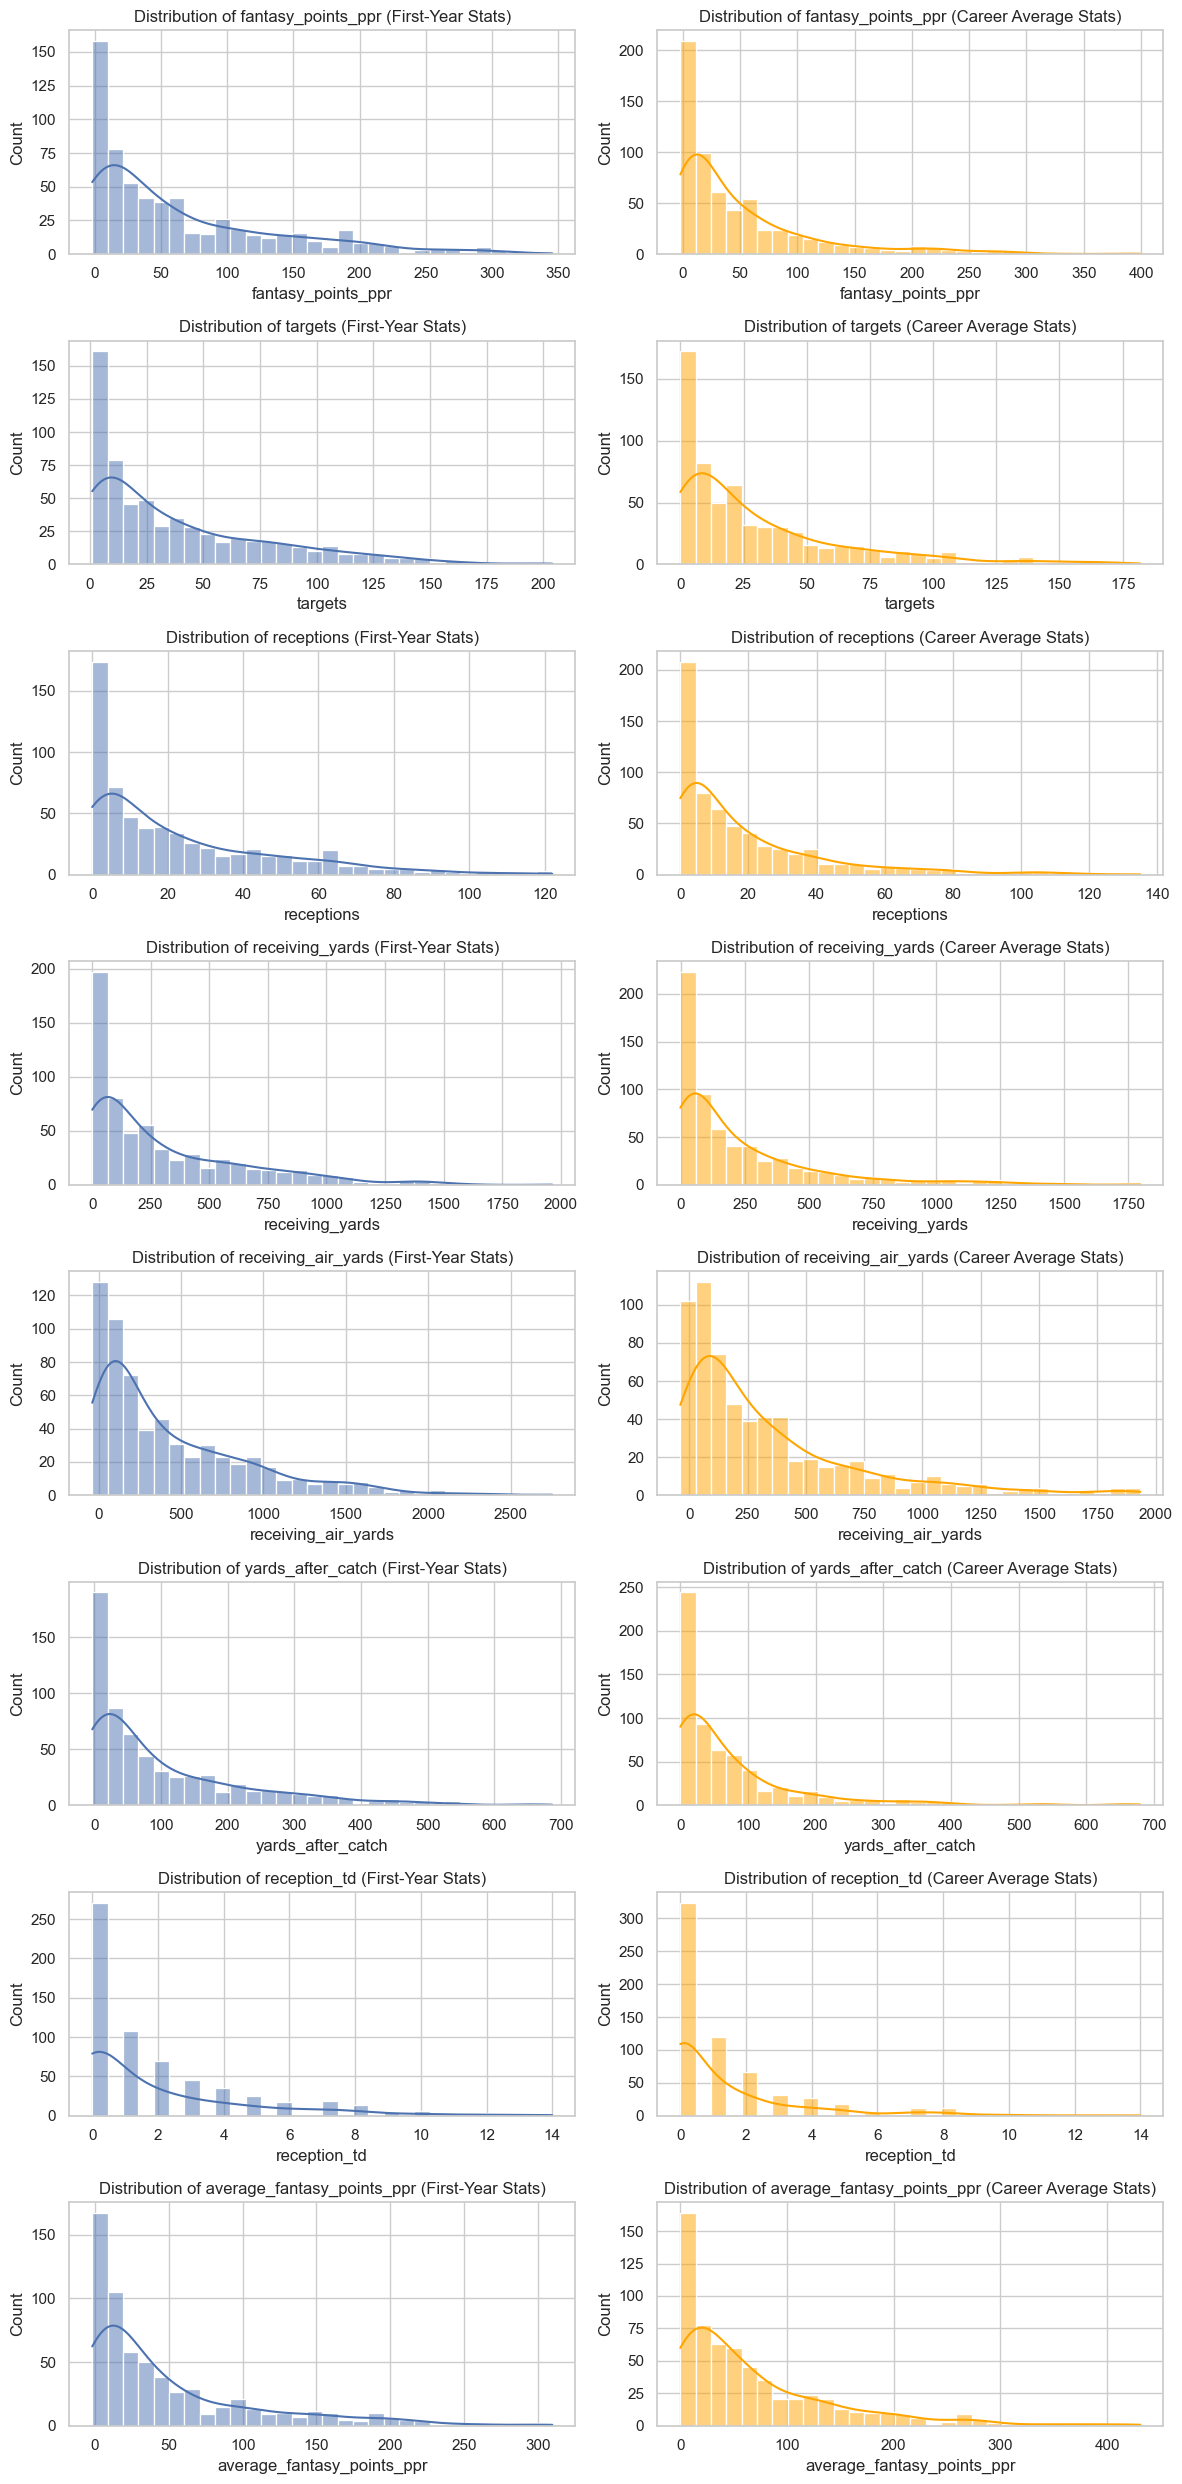

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set visualization style
sns.set(style="whitegrid")

# Select key columns for EDA
key_metrics = [
    "fantasy_points_ppr",
    "targets",
    "receptions",
    "receiving_yards",
    "receiving_air_yards",
    "yards_after_catch",
    "reception_td",
    "average_fantasy_points_ppr"
]

# Create histograms for first-year and career average stats
fig, axes = plt.subplots(len(key_metrics), 2, figsize=(12, 25))

for i, metric in enumerate(key_metrics):
    # First-year stats distribution
    sns.histplot(wr_first_season_df[metric], bins=30, kde=True, ax=axes[i, 0])
    axes[i, 0].set_title(f"Distribution of {metric} (First-Year Stats)")
    
    # Career stats distribution
    sns.histplot(wr_cleaned_filled[metric], bins=30, kde=True, ax=axes[i, 1], color="orange")
    axes[i, 1].set_title(f"Distribution of {metric} (Career Average Stats)")

plt.tight_layout()
plt.show()


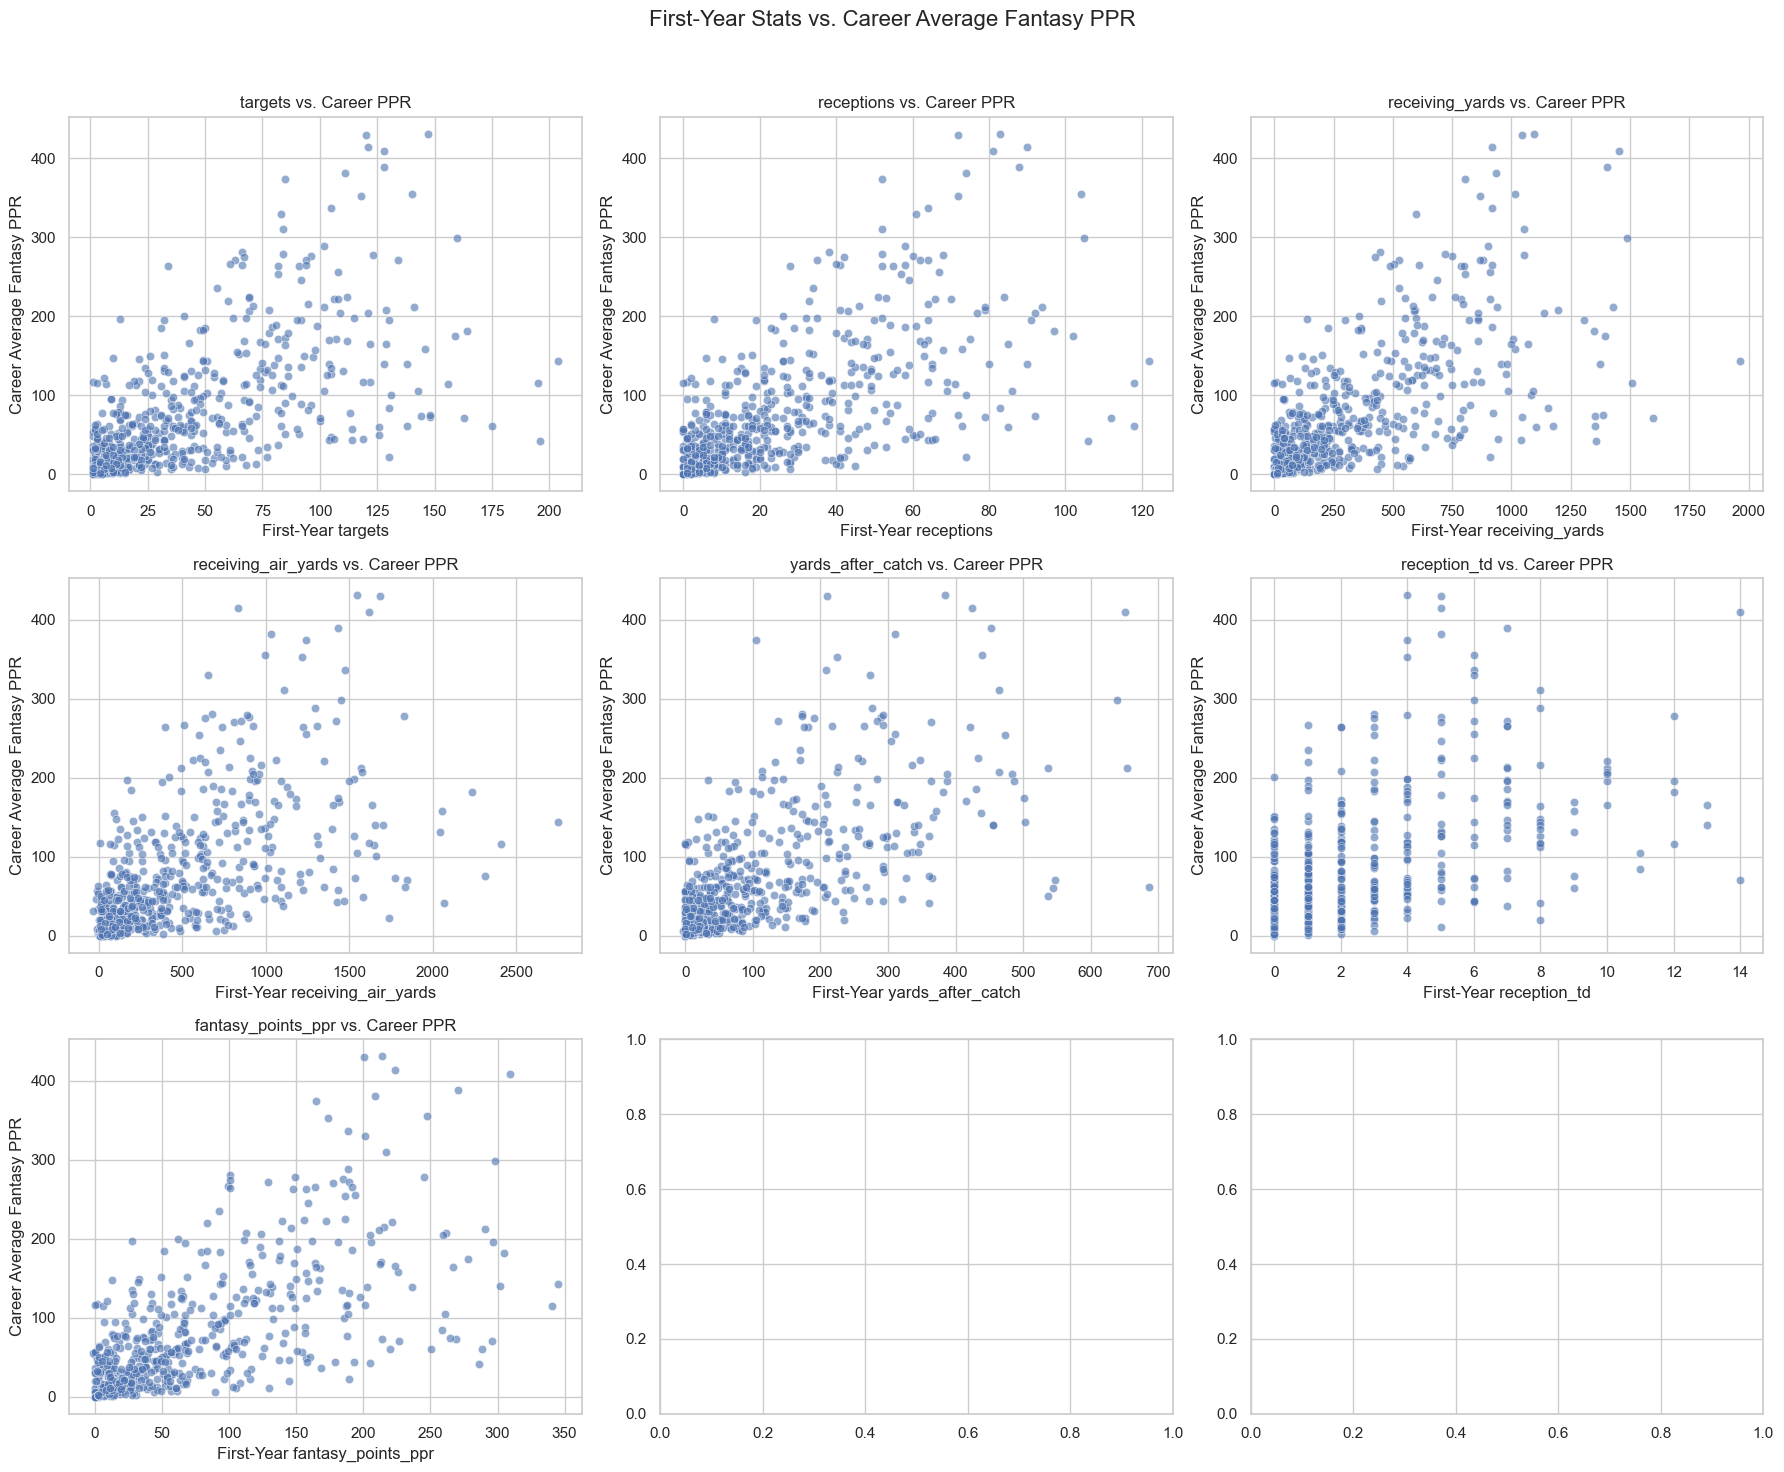

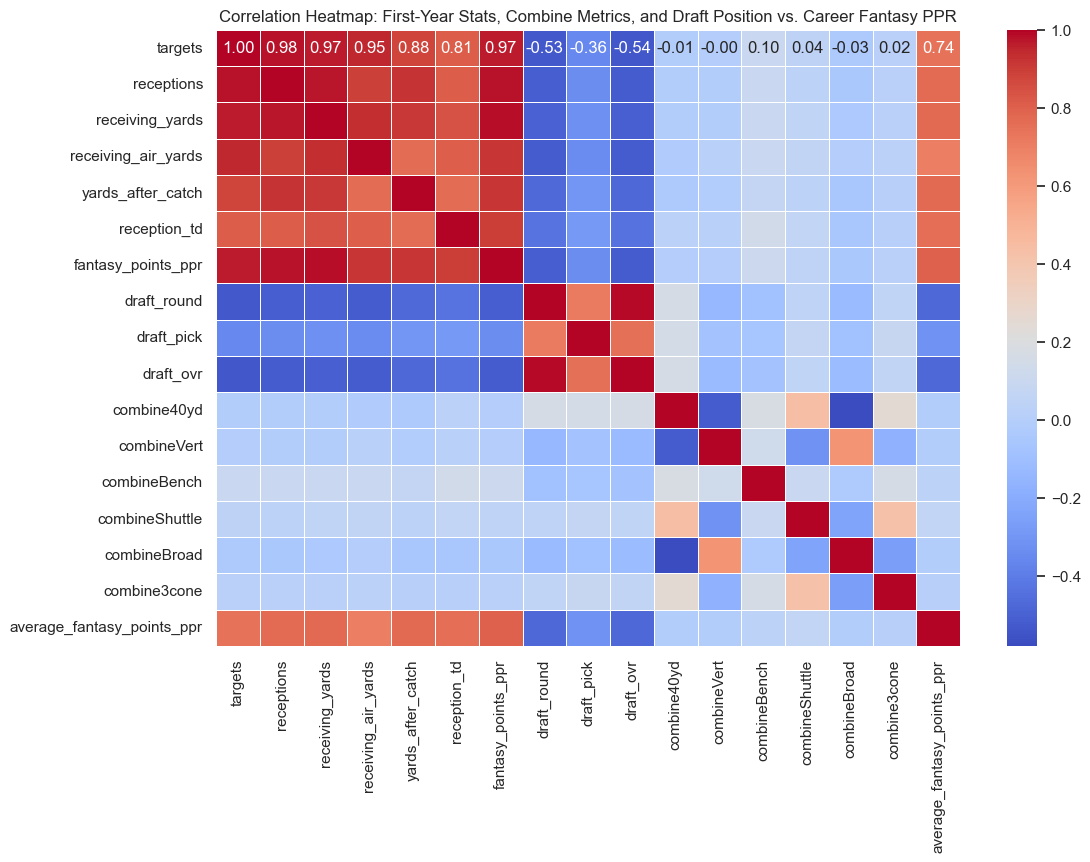

In [12]:
import numpy as np

# Scatterplots to show relationships between first-year stats and career fantasy PPR
fig, axes = plt.subplots(3, 3, figsize=(18, 15))
fig.suptitle("First-Year Stats vs. Career Average Fantasy PPR", fontsize=16)

scatter_metrics = [
    "targets", "receptions", "receiving_yards",
    "receiving_air_yards", "yards_after_catch", "reception_td",
    "fantasy_points_ppr"
]

for i, metric in enumerate(scatter_metrics):
    row, col = divmod(i, 3)
    sns.scatterplot(x=wr_first_season_df[metric], y=wr_cleaned_filled["average_fantasy_points_ppr"], ax=axes[row, col], alpha=0.6)
    axes[row, col].set_title(f"{metric} vs. Career PPR")
    axes[row, col].set_xlabel(f"First-Year {metric}")
    axes[row, col].set_ylabel("Career Average Fantasy PPR")

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# Correlation matrix of first-year stats, combine metrics, and draft position vs. career fantasy PPR
correlation_features = [
    "targets", "receptions", "receiving_yards", "receiving_air_yards", "yards_after_catch", "reception_td",
    "fantasy_points_ppr", "draft_round", "draft_pick", "draft_ovr",
    "combine40yd", "combineVert", "combineBench", "combineShuttle", "combineBroad", "combine3cone",
    "average_fantasy_points_ppr"
]

# Merge first-year stats with the most recent career fantasy PPR
wr_first_season_with_career_ppr = wr_first_season_df.merge(
    wr_cleaned_filled[["player_name", "average_fantasy_points_ppr"]],
    on="player_name",
    how="inner"
)

wr_first_season_with_career_ppr.rename(columns={"average_fantasy_points_ppr_y": "average_fantasy_points_ppr"}, inplace=True)

# Compute correlation matrix
correlation_matrix = wr_first_season_df[correlation_features].corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap: First-Year Stats, Combine Metrics, and Draft Position vs. Career Fantasy PPR")
plt.show()


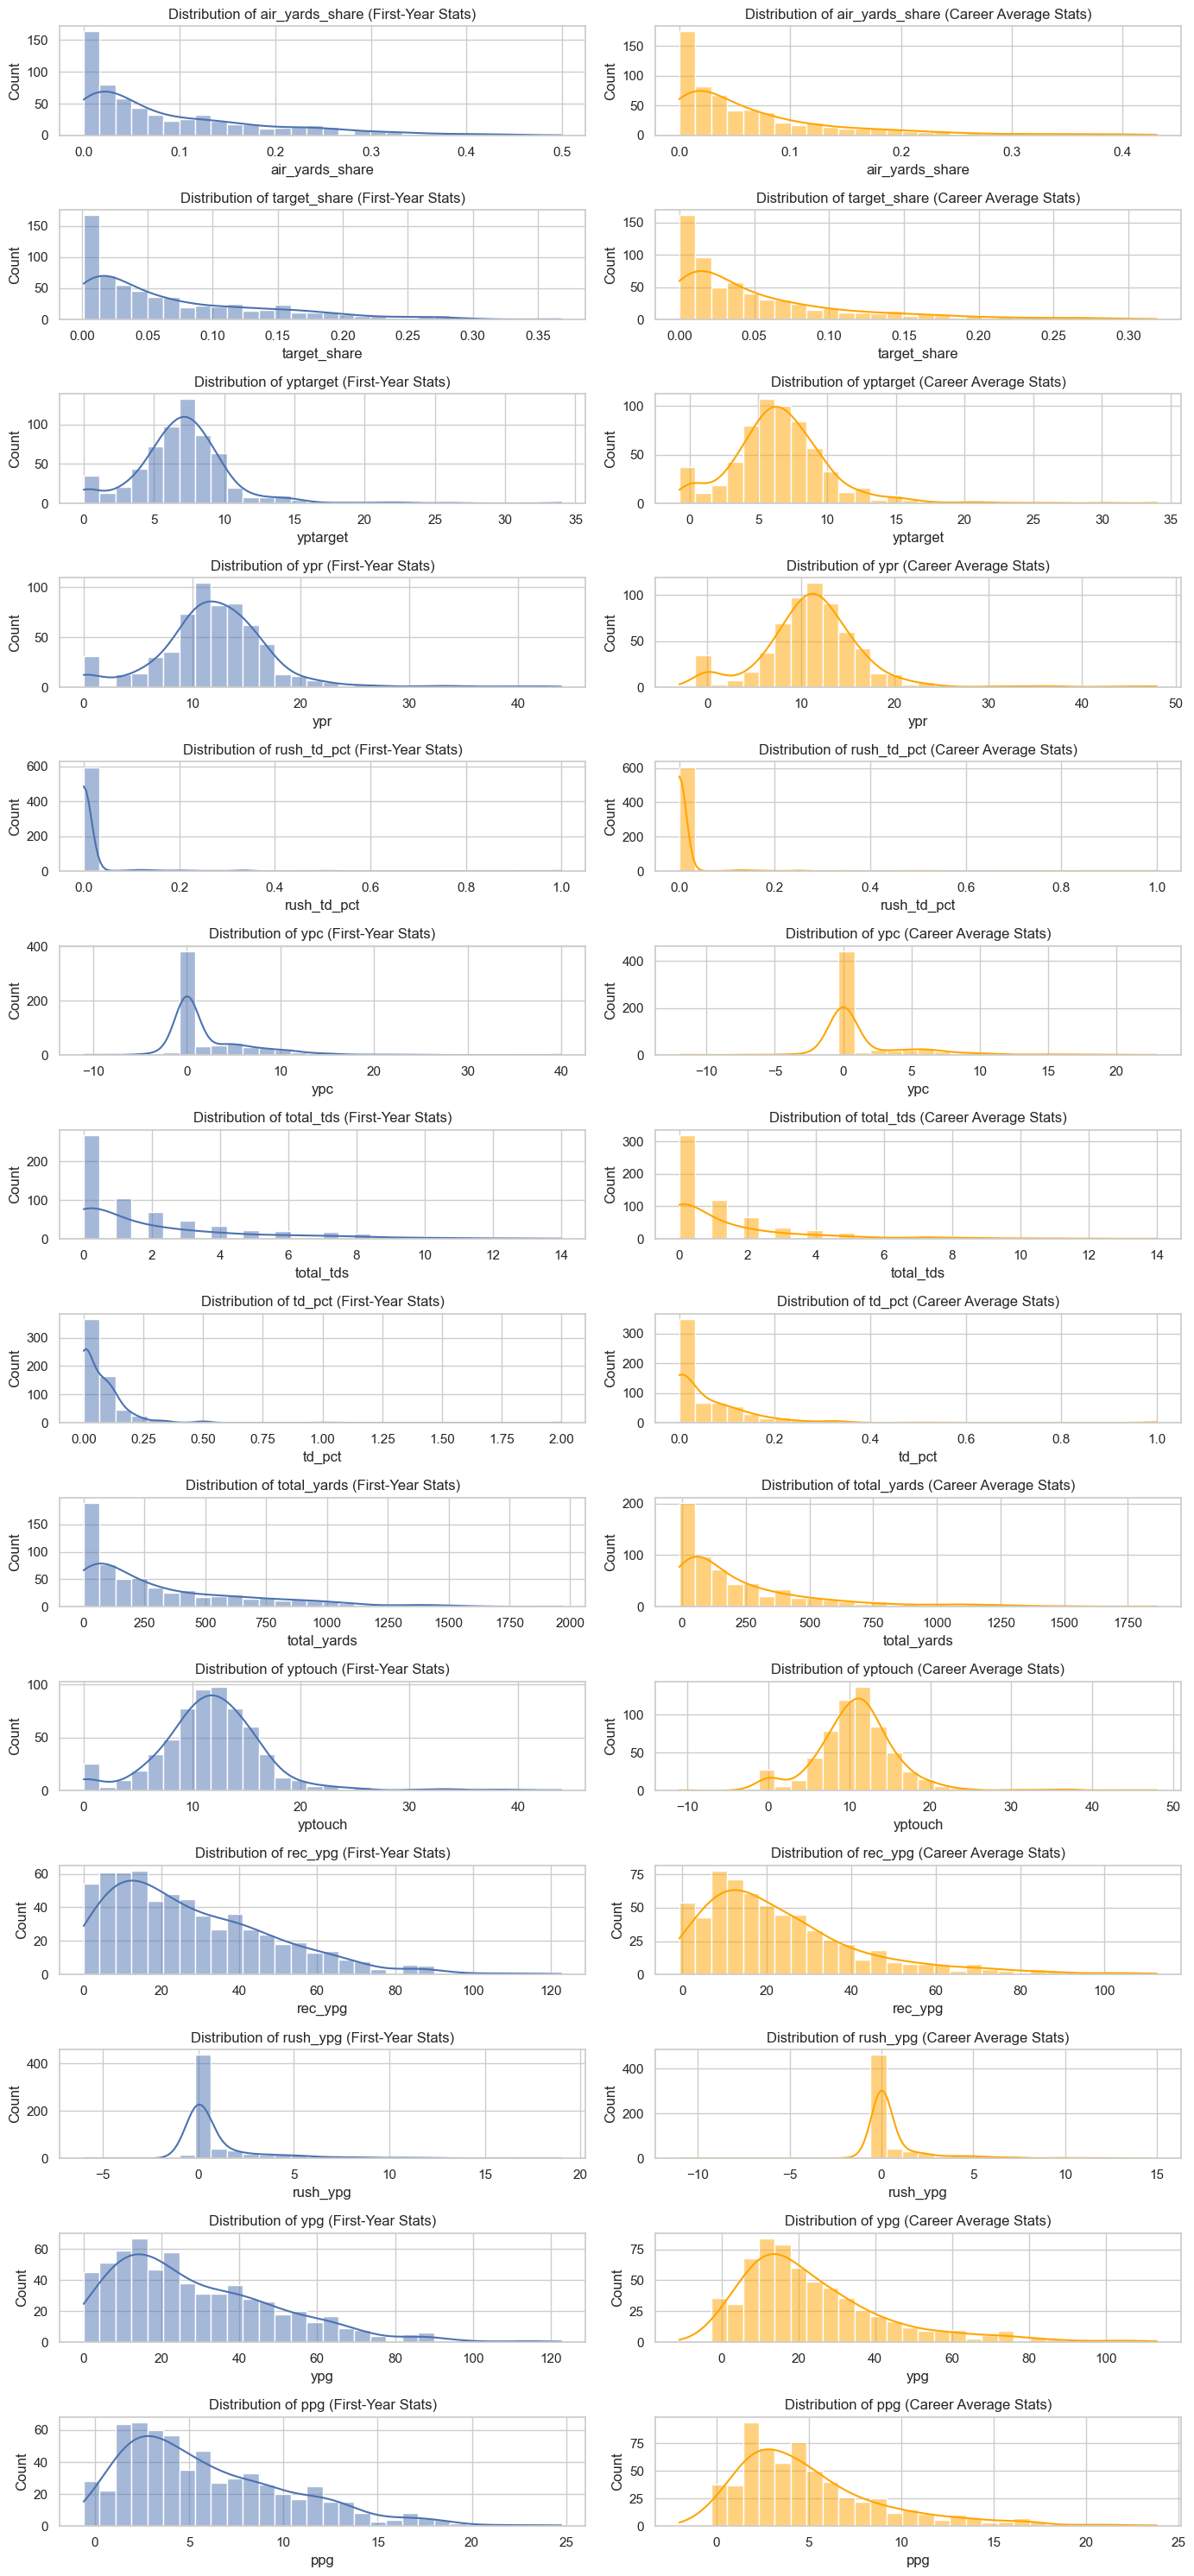

In [13]:
# Additional Stats to Explore
extra_metrics = [
    "air_yards_share", "target_share", "yptarget", "ypr", "rush_td_pct", "ypc",
    "total_tds", "td_pct", "total_yards", "yptouch", "rec_ypg", "rush_ypg", "ypg", "ppg"
]

# Create histograms for additional key stats in first-year vs career
fig, axes = plt.subplots(len(extra_metrics), 2, figsize=(14, 30))

for i, metric in enumerate(extra_metrics):
    # First-year stats distribution
    sns.histplot(wr_first_season_df[metric], bins=30, kde=True, ax=axes[i, 0])
    axes[i, 0].set_title(f"Distribution of {metric} (First-Year Stats)")
    
    # Career stats distribution
    sns.histplot(wr_cleaned_filled[metric], bins=30, kde=True, ax=axes[i, 1], color="orange")
    axes[i, 1].set_title(f"Distribution of {metric} (Career Average Stats)")

plt.tight_layout()
plt.show()


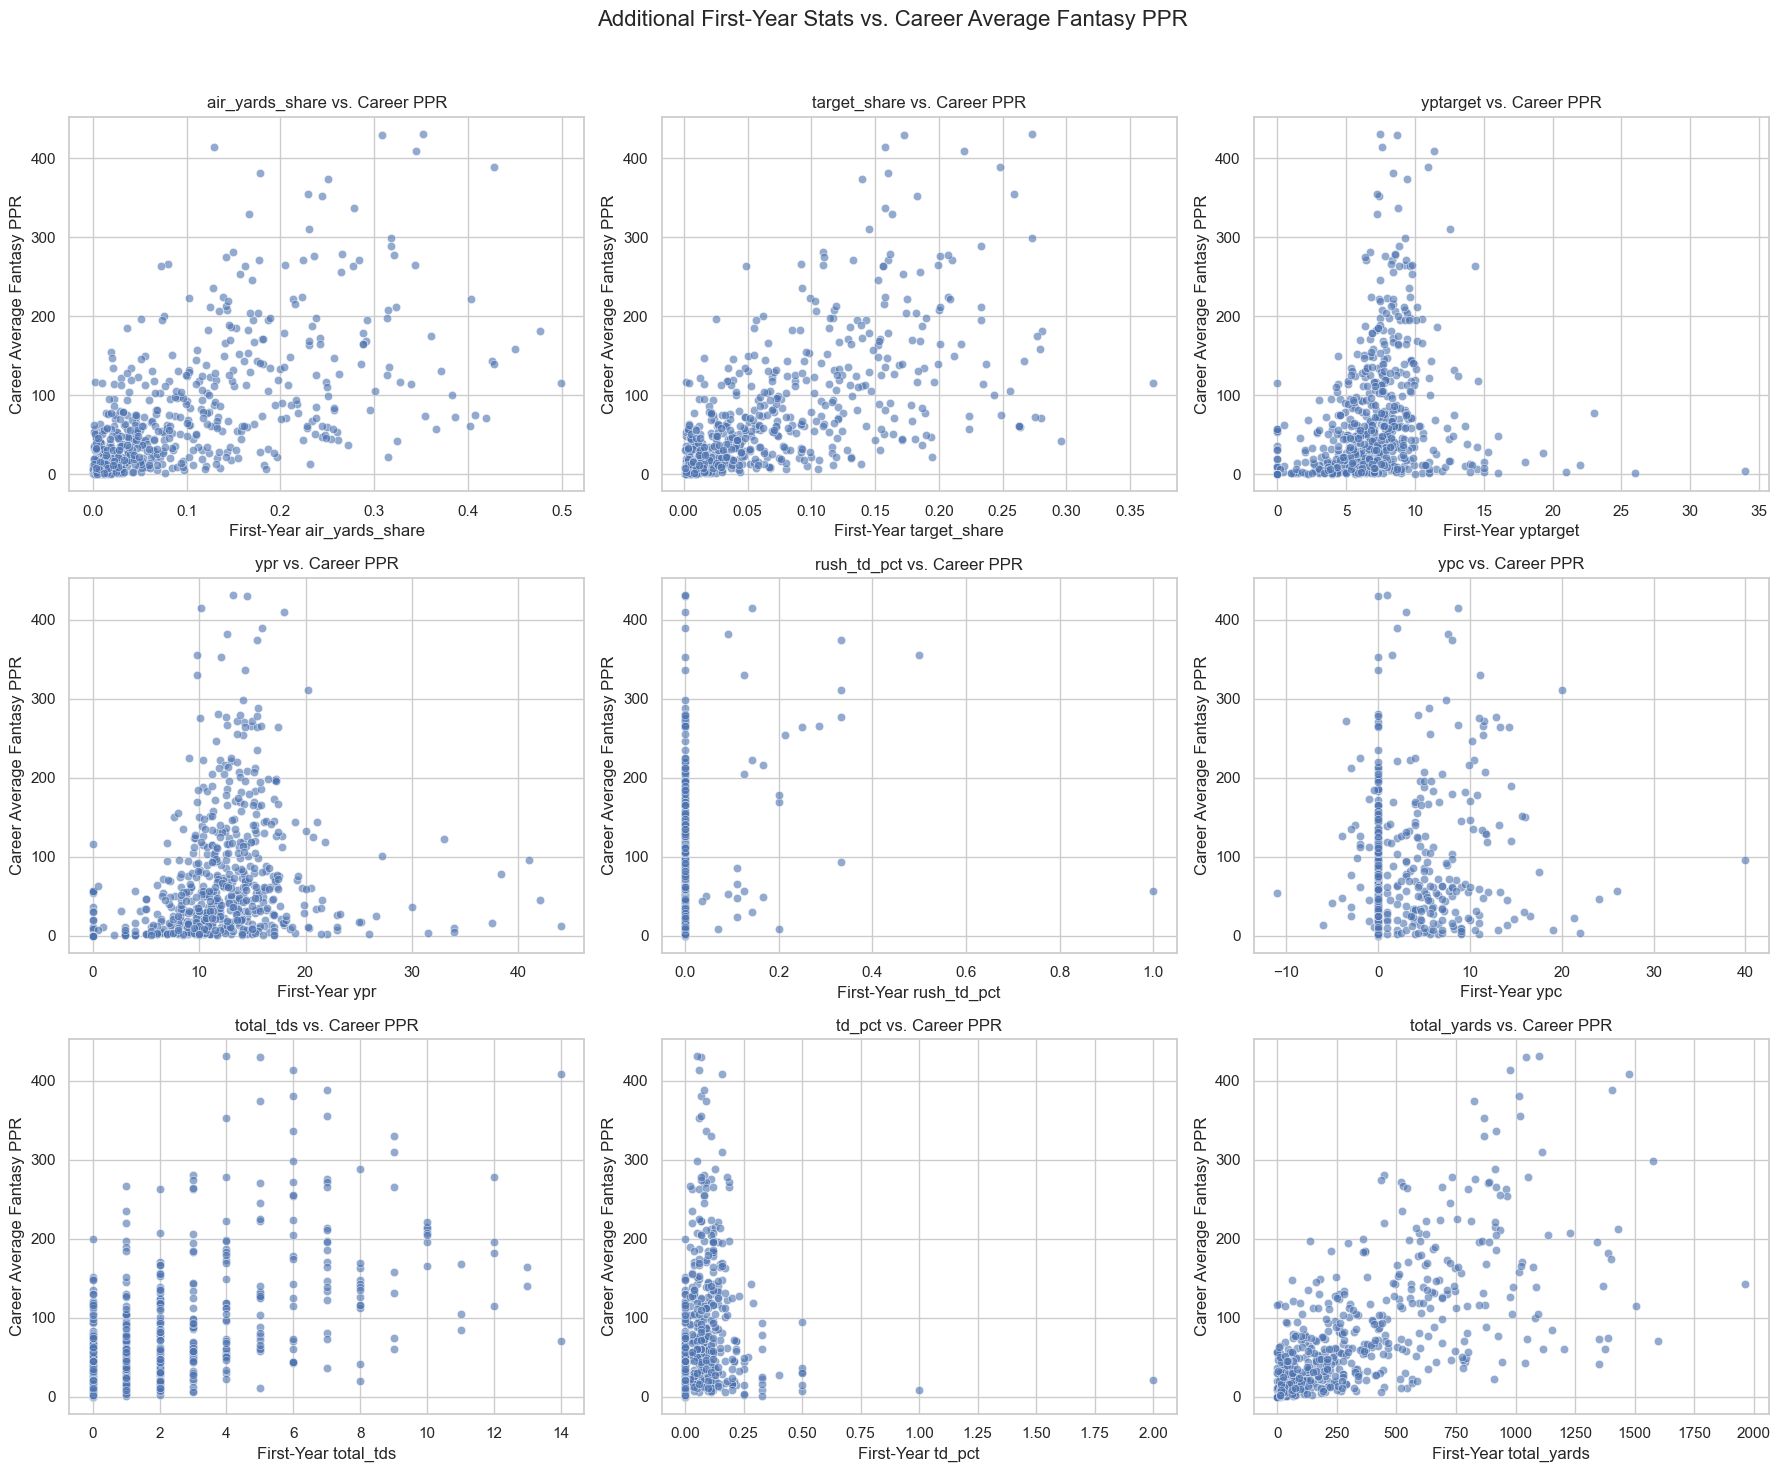

In [14]:
# Scatterplots for extra metrics vs Career PPR
fig, axes = plt.subplots(3, 3, figsize=(18, 15))
fig.suptitle("Additional First-Year Stats vs. Career Average Fantasy PPR", fontsize=16)

for i, metric in enumerate(extra_metrics[:9]):  # Display first 9 metrics in scatterplots
    row, col = divmod(i, 3)
    sns.scatterplot(x=wr_first_season_df[metric], y=wr_cleaned_filled["average_fantasy_points_ppr"], ax=axes[row, col], alpha=0.6)
    axes[row, col].set_title(f"{metric} vs. Career PPR")
    axes[row, col].set_xlabel(f"First-Year {metric}")
    axes[row, col].set_ylabel("Career Average Fantasy PPR")

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

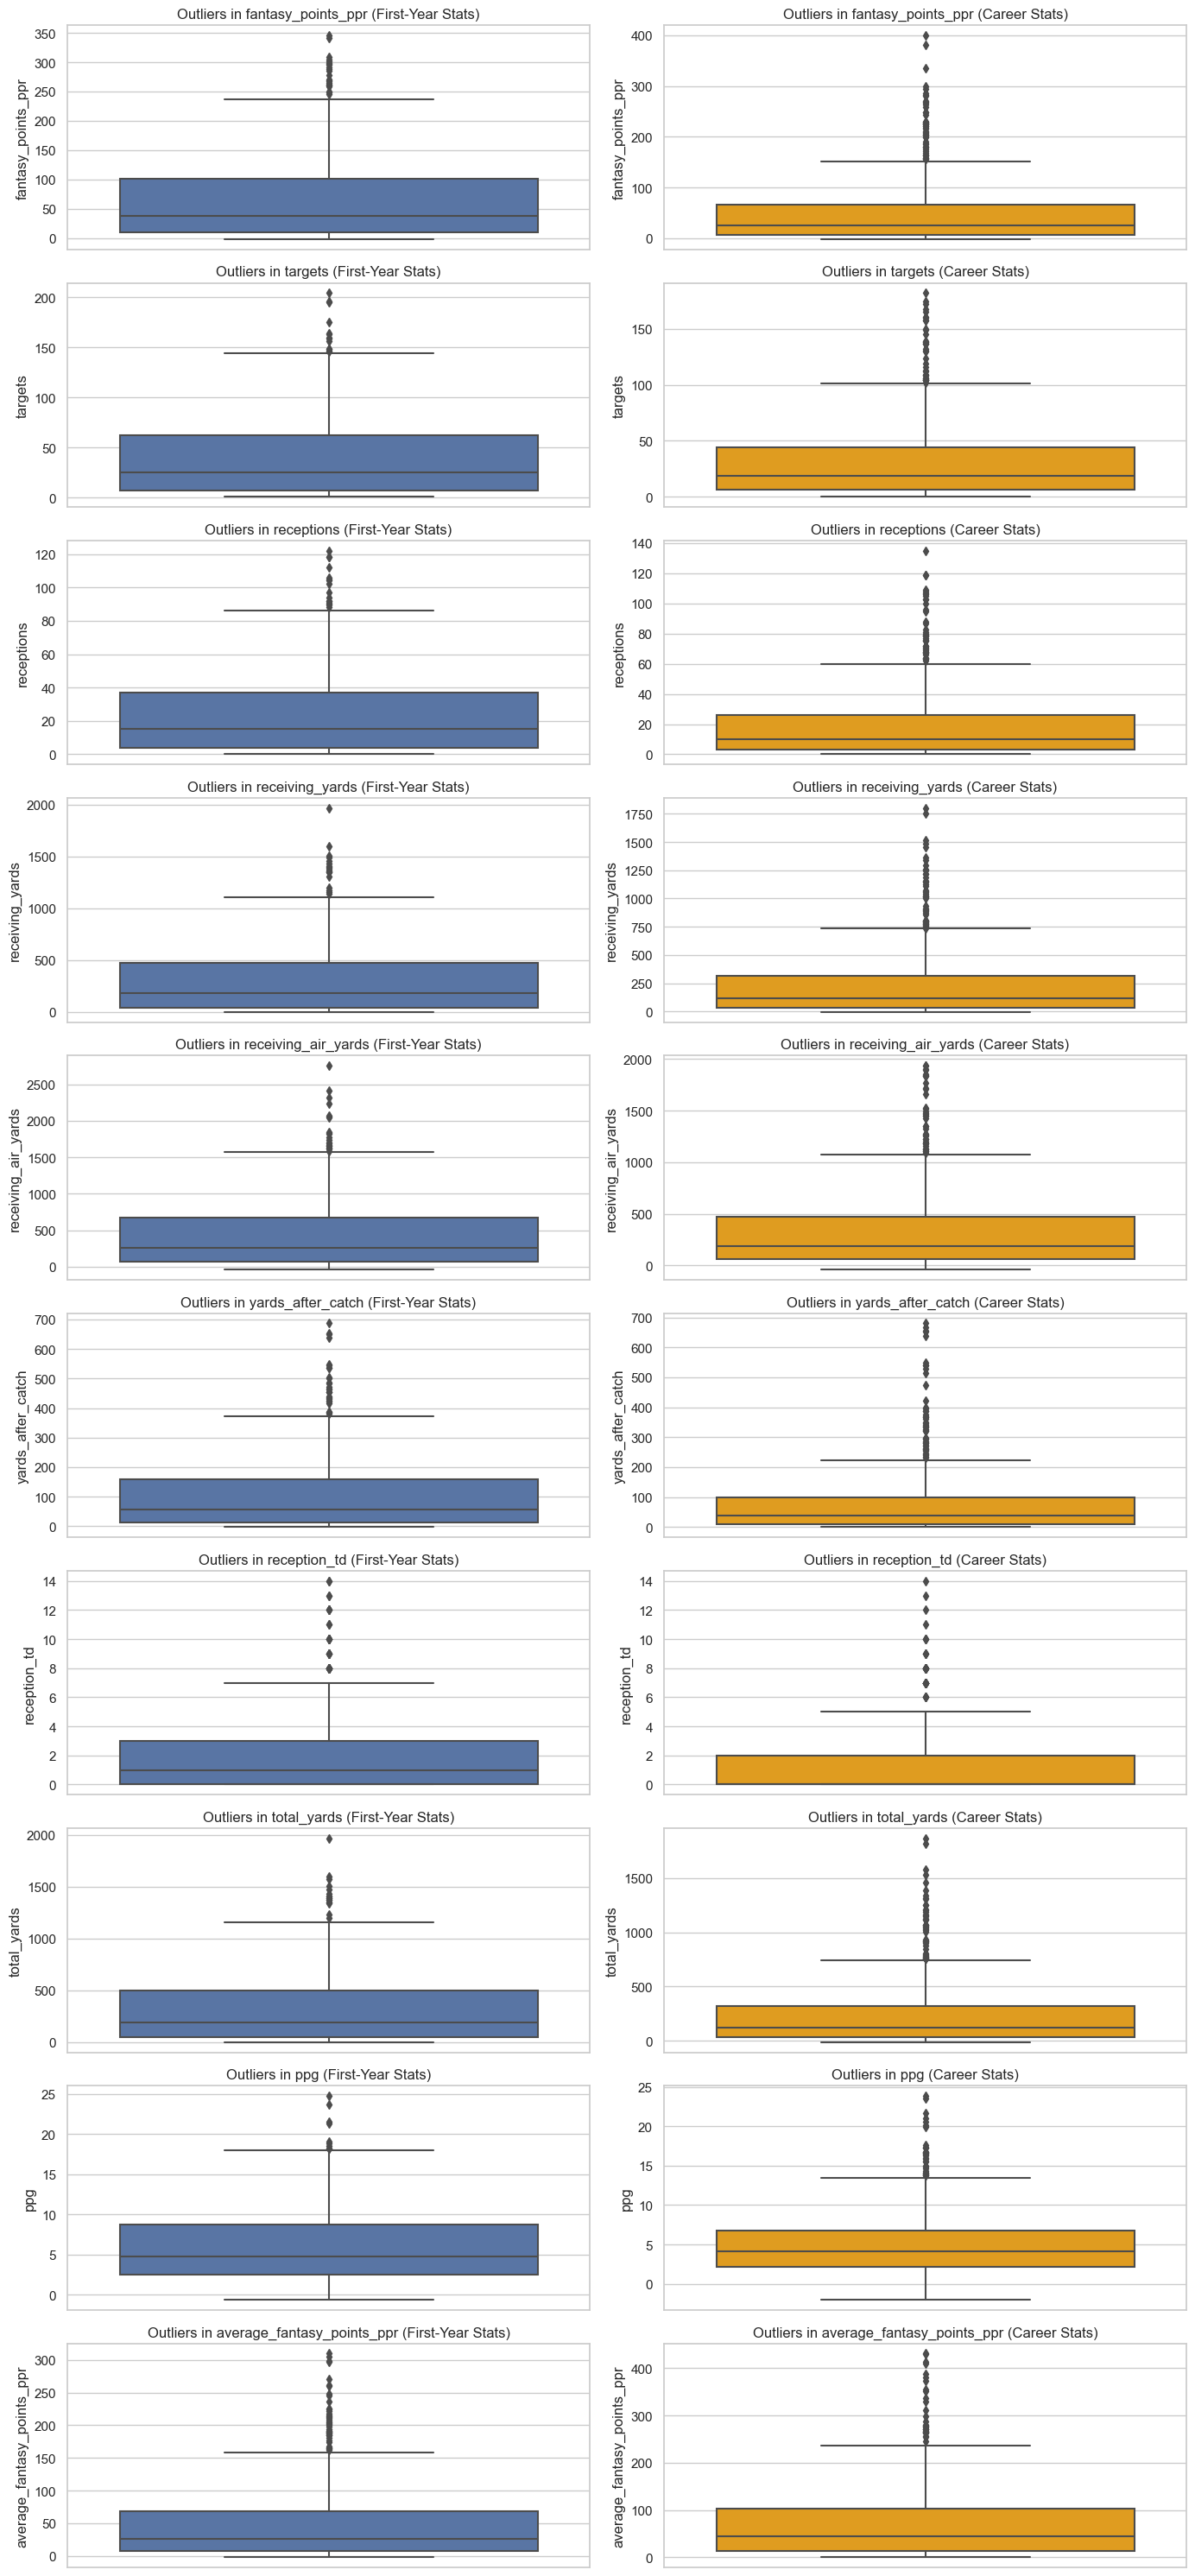

In [15]:
# Outlier Detection using Boxplots for Key Metrics
outlier_metrics = [
    "fantasy_points_ppr", "targets", "receptions", "receiving_yards", "receiving_air_yards", 
    "yards_after_catch", "reception_td", "total_yards", "ppg", "average_fantasy_points_ppr"
]

fig, axes = plt.subplots(len(outlier_metrics), 2, figsize=(14, 30))

for i, metric in enumerate(outlier_metrics):
    # First-Year Outliers
    sns.boxplot(y=wr_first_season_df[metric], ax=axes[i, 0])
    axes[i, 0].set_title(f"Outliers in {metric} (First-Year Stats)")
    
    # Career Outliers
    sns.boxplot(y=wr_cleaned_filled[metric], ax=axes[i, 1], color="orange")
    axes[i, 1].set_title(f"Outliers in {metric} (Career Stats)")

plt.tight_layout()
plt.show()

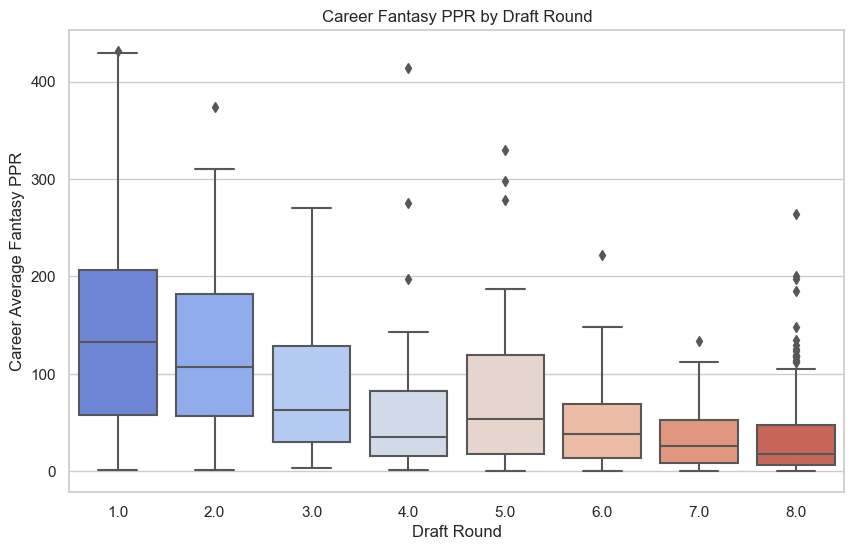

In [16]:
# Grouping Players by Draft Round for Career Fantasy PPR Analysis
draft_groups = wr_cleaned_filled.groupby("draft_round")["average_fantasy_points_ppr"].describe()

# Visualizing Career Fantasy PPR by Draft Round
plt.figure(figsize=(10, 6))
sns.boxplot(x=wr_cleaned_filled["draft_round"], y=wr_cleaned_filled["average_fantasy_points_ppr"], palette="coolwarm")
plt.title("Career Fantasy PPR by Draft Round")
plt.xlabel("Draft Round")
plt.ylabel("Career Average Fantasy PPR")
plt.show()

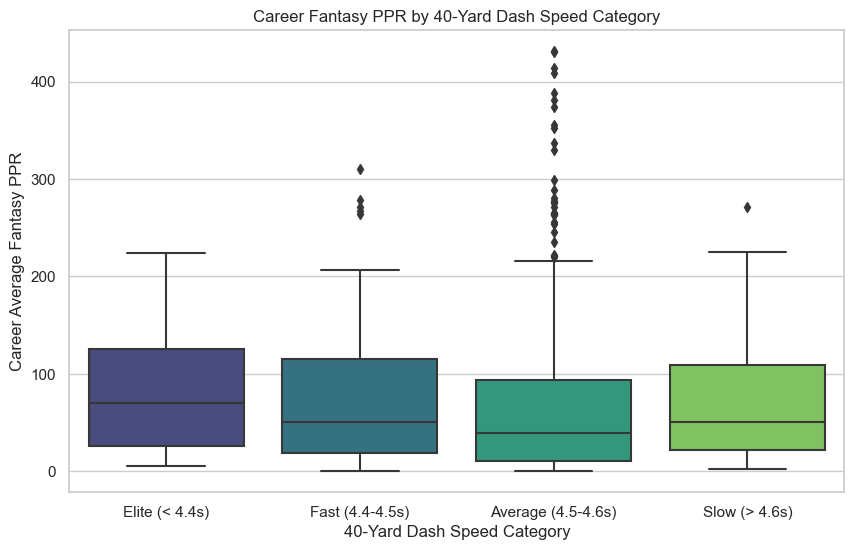

In [17]:
# Correcting the bin order for 40-Yard Dash Speed Categories
speed_bins = ["Elite (< 4.4s)", "Fast (4.4-4.5s)", "Average (4.5-4.6s)", "Slow (> 4.6s)"]

# Binning based on corrected order
wr_cleaned_filled["speed_category"] = pd.cut(
    wr_cleaned_filled["combine40yd"], 
    bins=[4.2, 4.4, 4.5, 4.6, 5.0],  # Now in increasing order
    labels=speed_bins, 
    include_lowest=True
)

# Boxplot of Career PPR by Speed Category
plt.figure(figsize=(10, 6))
sns.boxplot(x=wr_cleaned_filled["speed_category"], y=wr_cleaned_filled["average_fantasy_points_ppr"], palette="viridis")
plt.title("Career Fantasy PPR by 40-Yard Dash Speed Category")
plt.xlabel("40-Yard Dash Speed Category")
plt.ylabel("Career Average Fantasy PPR")
plt.show()

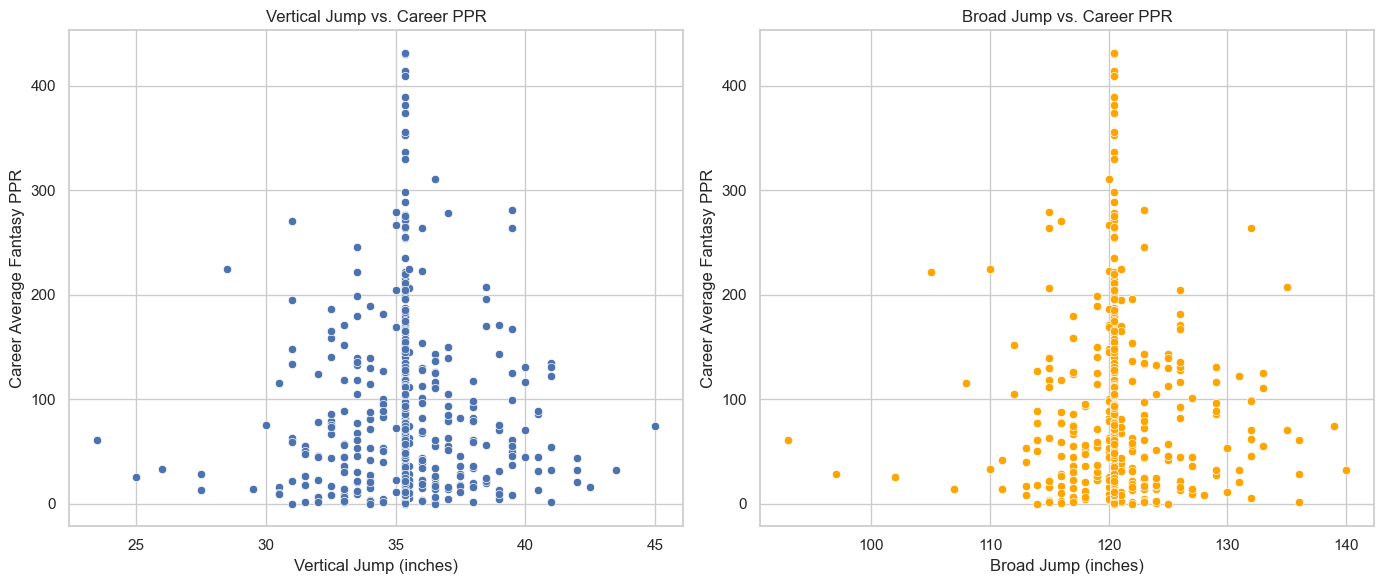

In [18]:
# Analyzing Vertical Jump and Broad Jump (Explosiveness)
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.scatterplot(x=wr_cleaned_filled["combineVert"], y=wr_cleaned_filled["average_fantasy_points_ppr"], ax=axes[0])
axes[0].set_title("Vertical Jump vs. Career PPR")
axes[0].set_xlabel("Vertical Jump (inches)")
axes[0].set_ylabel("Career Average Fantasy PPR")

sns.scatterplot(x=wr_cleaned_filled["combineBroad"], y=wr_cleaned_filled["average_fantasy_points_ppr"], ax=axes[1], color="orange")
axes[1].set_title("Broad Jump vs. Career PPR")
axes[1].set_xlabel("Broad Jump (inches)")
axes[1].set_ylabel("Career Average Fantasy PPR")

plt.tight_layout()
plt.show()

In [19]:
# Standardized Combine Score (Z-Score Normalization)
combine_metrics = ["combine40yd", "combineVert", "combineBroad", "combineShuttle", "combine3cone"]
for metric in combine_metrics:
    wr_cleaned_filled[f"{metric}_zscore"] = (wr_cleaned_filled[metric] - wr_cleaned_filled[metric].mean()) / wr_cleaned_filled[metric].std()

# Create a Composite Combine Score (Sum of Standardized Scores)
wr_cleaned_filled["combine_athletic_score"] = (
    -wr_cleaned_filled["combine40yd_zscore"] +  # Negate because lower 40yd is better
    wr_cleaned_filled["combineVert_zscore"] +
    wr_cleaned_filled["combineBroad_zscore"] +
    -wr_cleaned_filled["combineShuttle_zscore"] +  # Negate because lower shuttle is better
    -wr_cleaned_filled["combine3cone_zscore"]   # Negate because lower 3-cone is better
)

scaler = StandardScaler()

# Check if all combine metrics exist in the dataset before applying transformation
available_combine_metrics = [metric for metric in combine_metrics if metric in wr_first_season_df.columns]
wr_first_season_df[available_combine_metrics] = scaler.fit_transform(wr_first_season_df[available_combine_metrics])

# Compute a Composite Combine Score
wr_first_season_df["combine_athletic_score"] = (
    -wr_first_season_df["combine40yd"] +  # Lower 40yd is better
    wr_first_season_df["combineVert"] +
    wr_first_season_df["combineBroad"] +
    -wr_first_season_df["combineShuttle"] +  # Lower shuttle is better
    -wr_first_season_df["combine3cone"]   # Lower 3-cone is better
)

In [ ]:
model_data = wr_first_season_df.copy()
model_data = model_data.drop(columns=["average_fantasy_points_ppr"], errors="ignore")

# Merge with wr_cleaned_filled to add the correct "average_fantasy_points_ppr" from career stats
model_data = model_data.merge(
    wr_cleaned_filled[["player_name", "average_fantasy_points_ppr"]],
    on="player_name",
    how="inner"
)

model_data.to_csv("../datasets/final_data.csv", index=False)